# Bank Marketing 

**数据集读取**

In [1]:
bank_additional_full_df<-read.csv('./data/bank-additional/bank-additional-full.csv',sep=';')
bank_additional_df=read.csv('./data/bank-additional/bank-additional.csv',sep=';')
bank_full_df=read.csv('./data/bank/bank-full.csv',sep=';')
bank_df=read.csv('./data/bank/bank.csv',sep=';')
dat=bank_additional_full_df

**查看列信息**

In [2]:
colnames(dat)
str(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

'data.frame':	41188 obs. of  21 variables:
 $ age           : int  56 57 37 40 56 45 59 41 24 25 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ duration      : int  261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : i

**是否存在空值**

In [3]:
indx<-apply(dat,2,function(x) any(is.na(x)))
indx
dat[1:5,1:12]
dat[1:5,13:21]
dim(dat)

age            job        marital      education        default 
         FALSE          FALSE          FALSE          FALSE          FALSE 
       housing           loan        contact          month    day_of_week 
         FALSE          FALSE          FALSE          FALSE          FALSE 
      duration       campaign          pdays       previous       poutcome 
         FALSE          FALSE          FALSE          FALSE          FALSE 
  emp.var.rate cons.price.idx  cons.conf.idx      euribor3m    nr.employed 
         FALSE          FALSE          FALSE          FALSE          FALSE 
             y 
         FALSE

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1


pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 41188    21

In [4]:
library(pastecs)
library(ggplot2)
library(dfexplore)
# stat.desc(bank_additional_full_df)
# dfplot(dat)

[1] "yes" "no"

[1] "yes(11.27%)        " "no(88.73%)        "

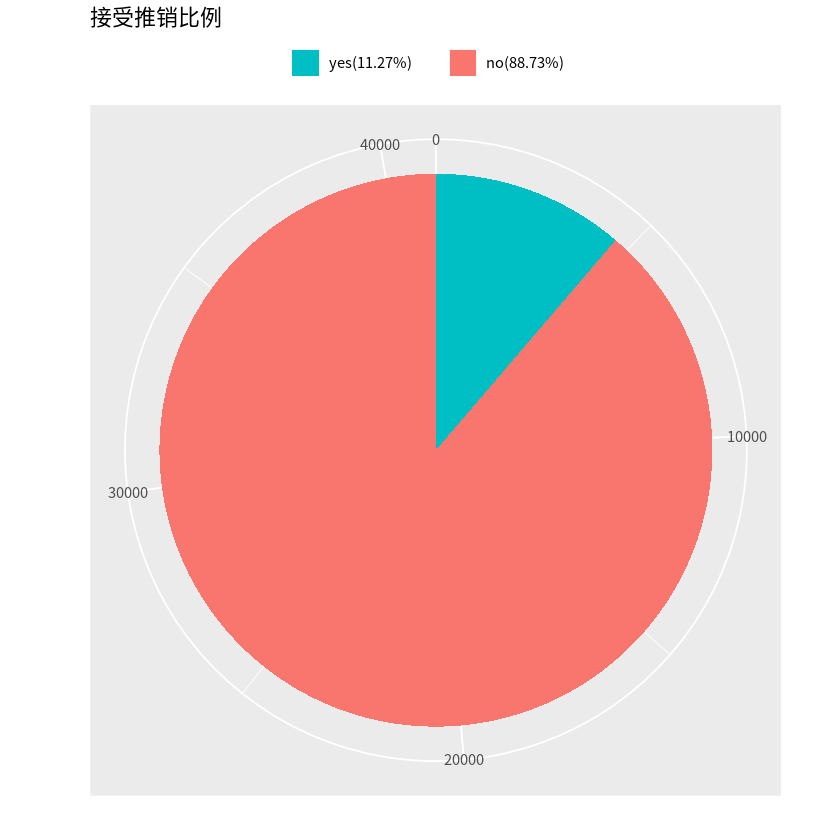

In [5]:
library(ggplot2)
dt=data.frame(A=c(sum(dat$y=='yes'),sum(dat$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
myLabel
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p+ggtitle('接受推销比例')


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


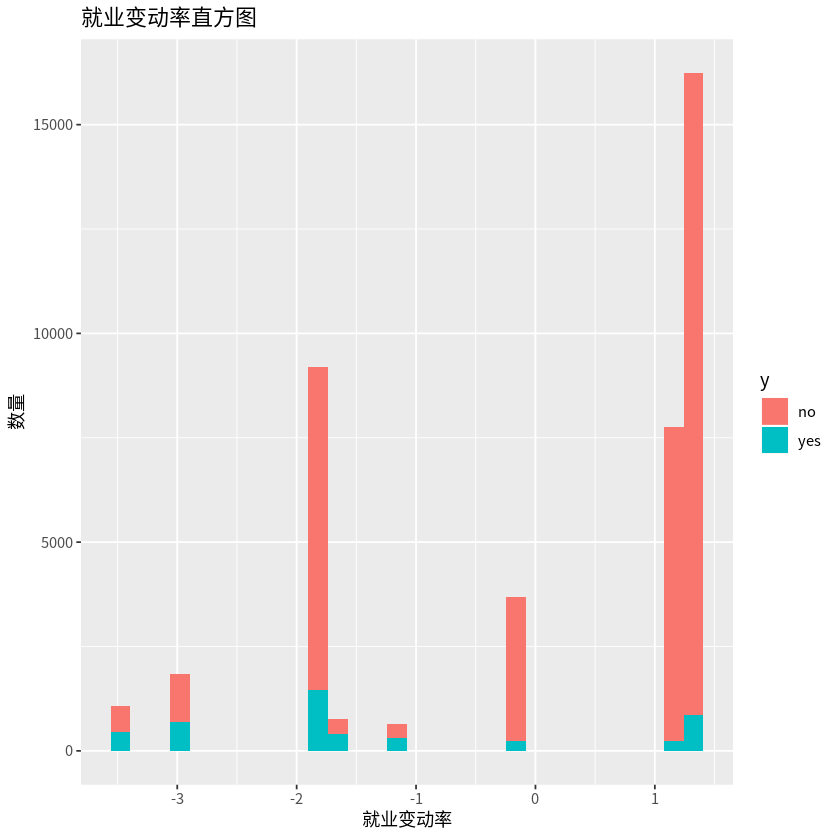

In [6]:
p<-ggplot(dat)+geom_histogram(aes(x=emp.var.rate,fill=y))
p+xlab('就业变动率')+ylab('数量')+ggtitle('就业变动率直方图')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


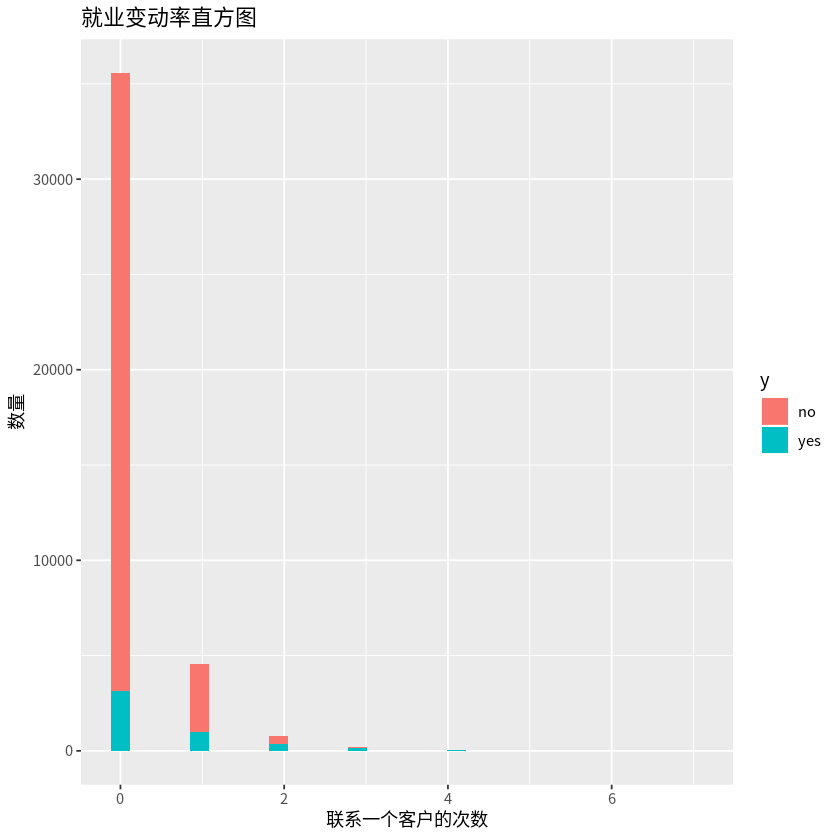

In [7]:
# previous属性直方图(联系次数)
# pdf('img/img01.pdf',width=4,height=4)
# theme(text = element_text(family='GB1'))
p<-ggplot(dat)+geom_histogram(aes(x=previous,fill=y))
p+xlab('联系一个客户的次数')+ylab('数量')+ggtitle('就业变动率直方图')
# +  theme(text = element_text(family='GB1'))
# dev.off()

Warning message:
“Ignoring unknown aesthetics: width”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


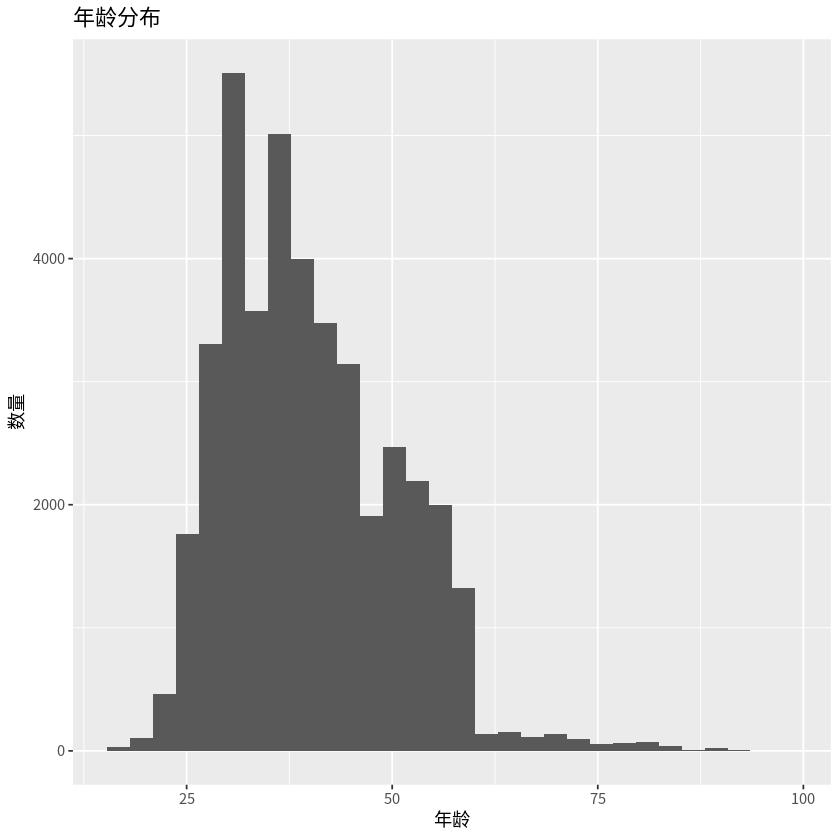

In [8]:
# previous属性直方图(联系次数)
# pdf('img/img01.pdf',width=4,height=4)
# theme(text = element_text(family='GB1'))
p<-ggplot(dat)+geom_histogram(aes(x=age,width=1))
p+xlab('年龄')+ylab('数量')+ggtitle('年龄分布')

nbr.val     nbr.null       nbr.na          min          max        range 
4.118800e+04 4.000000e+00 0.000000e+00 0.000000e+00 8.196667e+01 8.196667e+01 
         sum       median         mean      SE.mean CI.mean.0.95          var 
1.773040e+05 3.000000e+00 4.304750e+00 2.129272e-02 4.173419e-02 1.867381e+01 
     std.dev     coef.var 
4.321321e+00 1.003849e+00

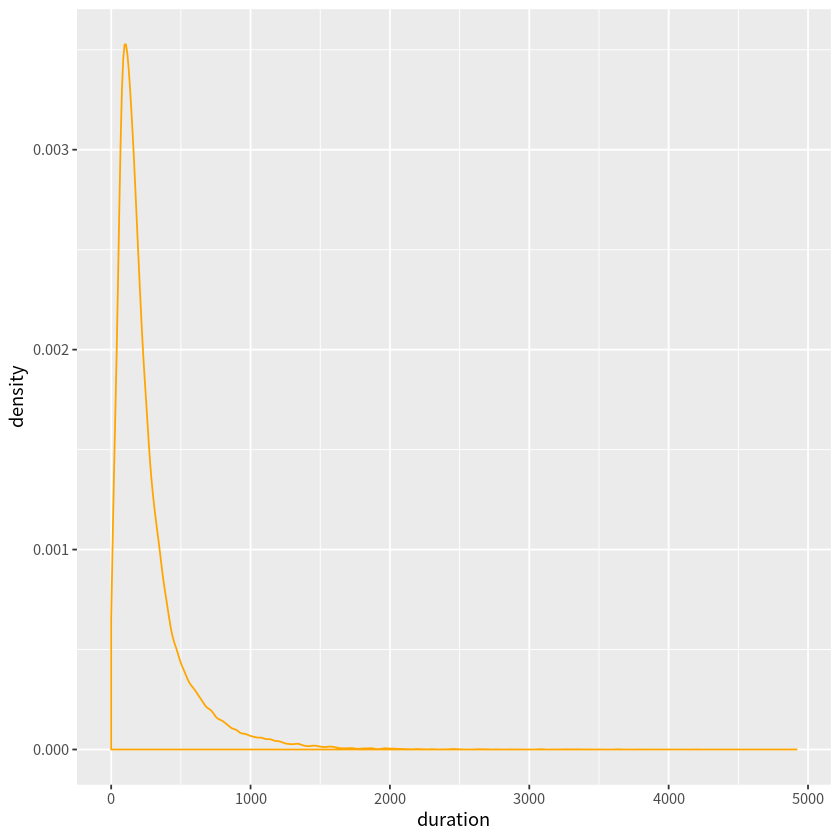

In [9]:
library(pastecs)
stat.desc(dat$duration/60)
ggplot(dat, aes(x=duration)) + geom_density(colour='orange')

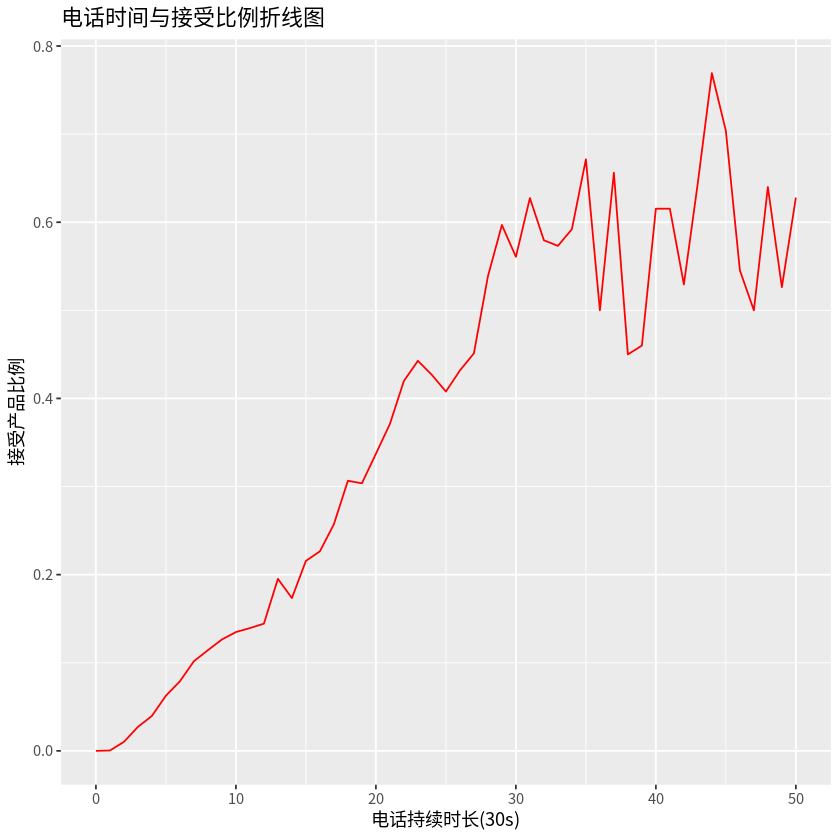

In [10]:
myfunc <- function(x){
  sum(x=='yes')/length(x)
}
dat2<-dat
dat2$duration[dat2$duration>1500]<-1500
dat2$duration<-dat2$duration%/%30
dur<-aggregate(dat2$y, by=list(dat2$duration),FUN=myfunc)
library(ggplot2)
# library(lubridate) 
p<-ggplot(data = dur, mapping = aes(x = Group.1, y = x, group = 1000)) + geom_line(
    colour='red')
p+xlab('电话持续时长(30s)')+ylab("接受产品比例")+ggtitle('电话时间与接受比例折线图')

In [11]:
colnames(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [12]:
dat_e<-dat[,-11]
colnames(dat_e)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "campaign"       "pdays"         
[13] "previous"       "poutcome"       "emp.var.rate"   "cons.price.idx"
[17] "cons.conf.idx"  "euribor3m"      "nr.employed"    "y"

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


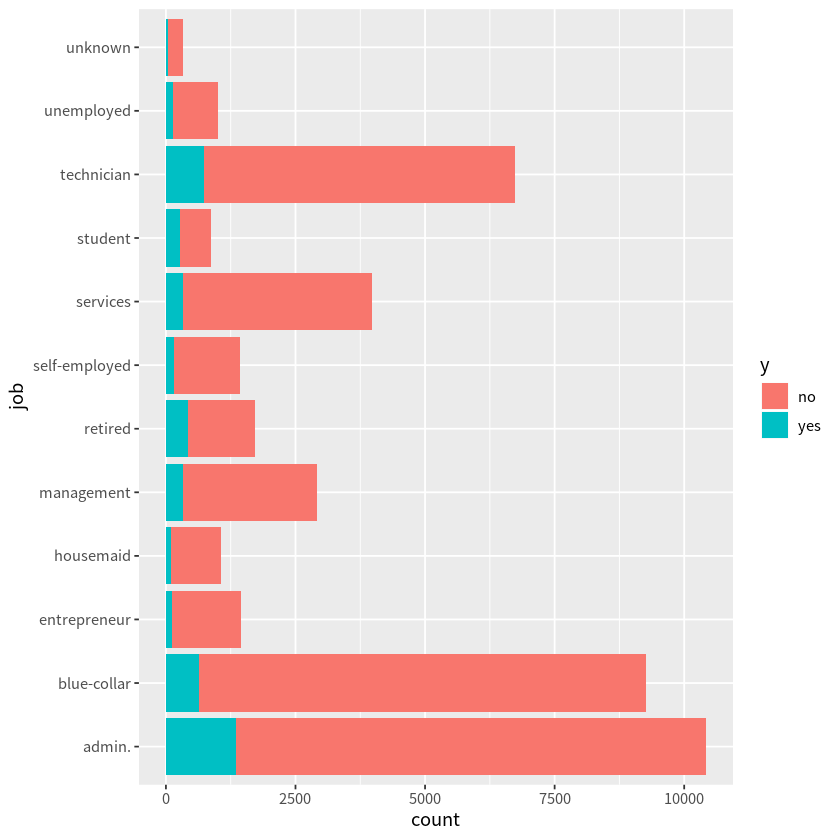

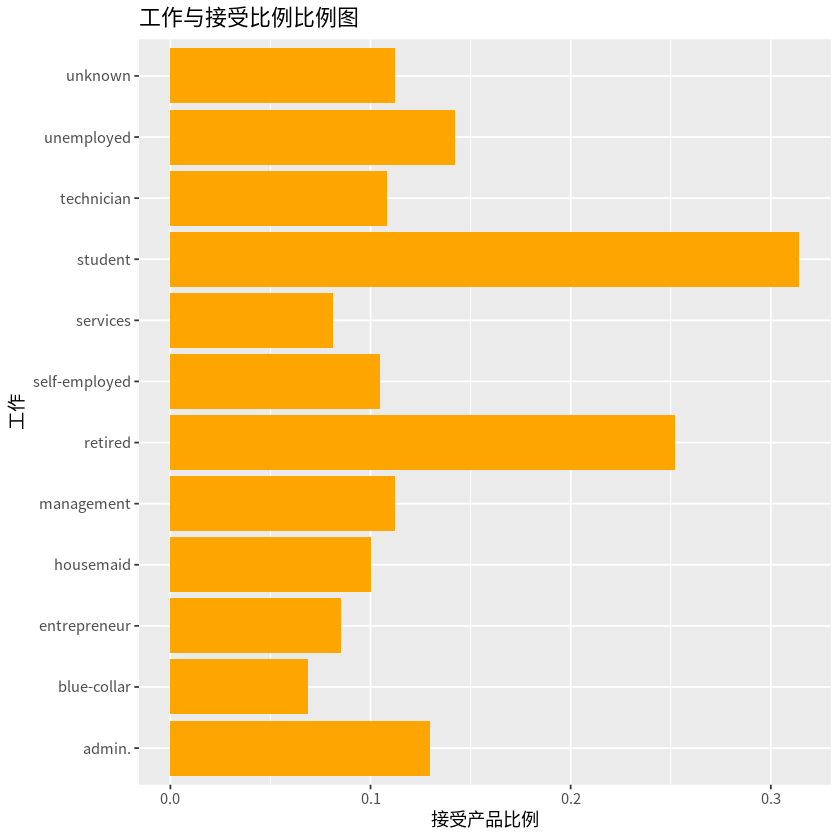

In [13]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
job<-aggregate(dat2$y, by=list(dat2$job),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=job,fill=y)) + geom_bar(stat="count")+coord_flip()

p<-ggplot(data = job, mapping = aes(x = Group.1, y = x)) + geom_line(
    colour='red')+geom_bar(stat='identity',fill='orange')+coord_flip()
p+xlab('工作')+ylab("接受产品比例")+ggtitle('工作与接受比例比例图')


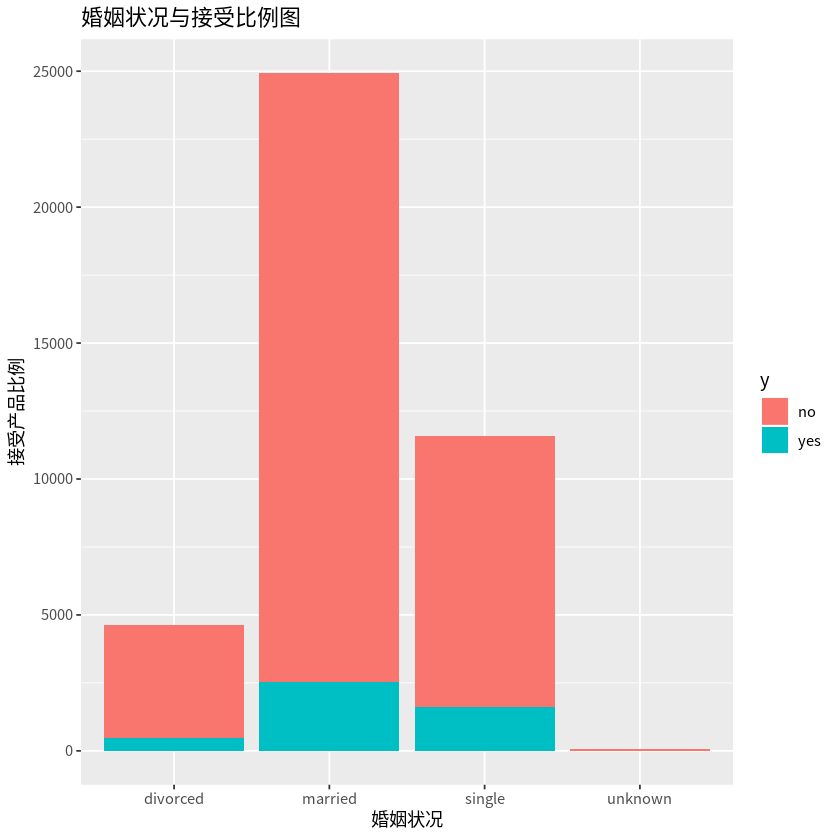

In [14]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
marital<-aggregate(dat2$y, by=list(dat2$marital),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=marital,fill=y)) + geom_bar(stat="count")+xlab('婚姻状况')+ylab("接受产品比例")+ggtitle('婚姻状况与接受比例图')


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


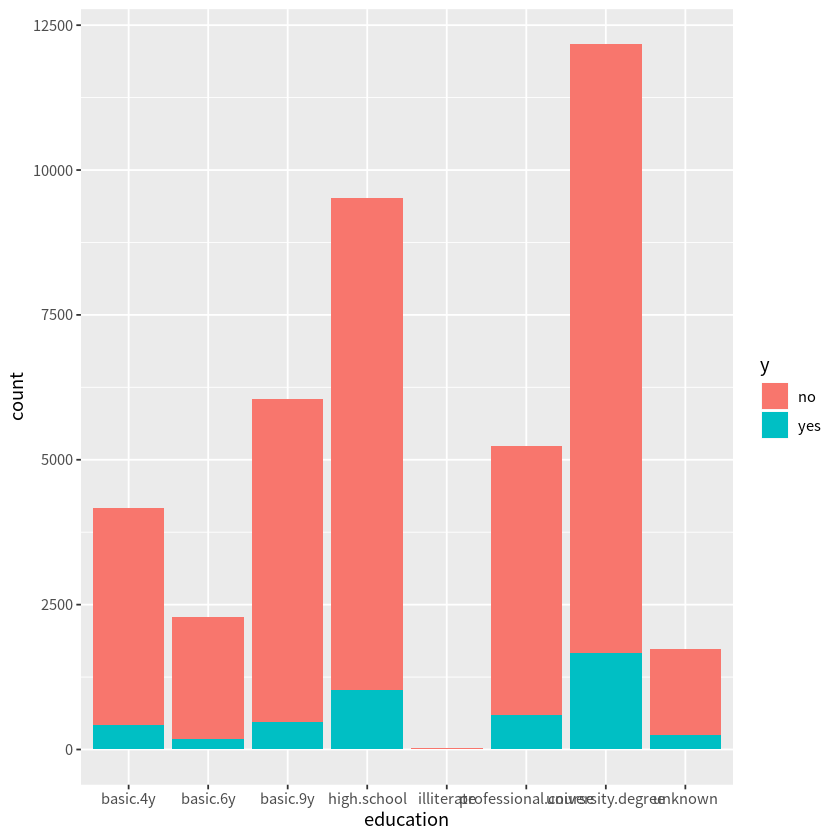

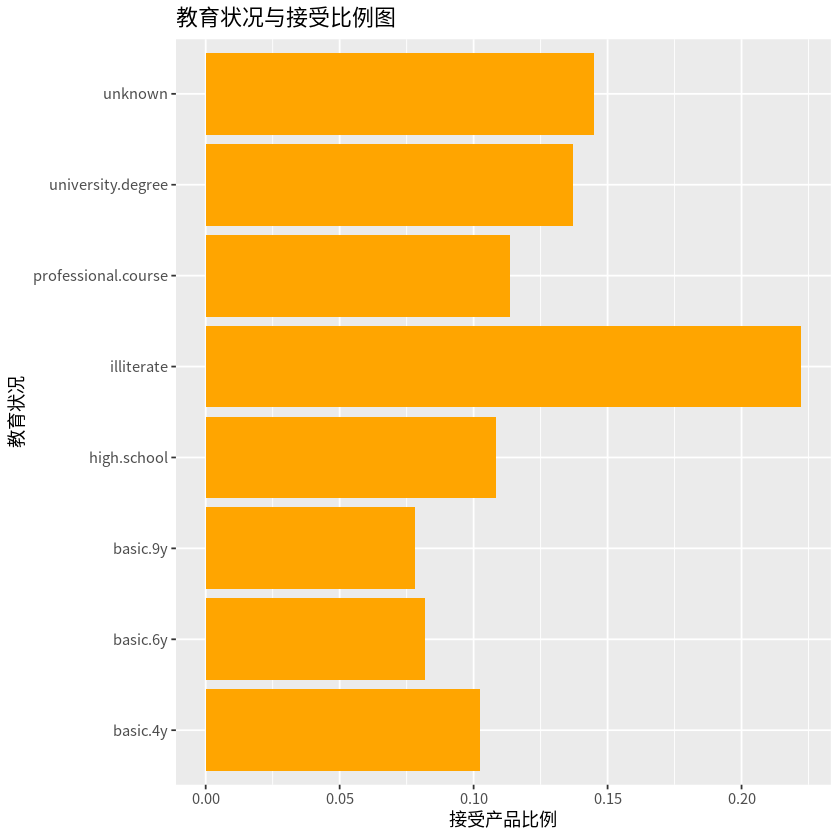

In [15]:
library(ggplot2)
myfunc <- function(x){
  sum(x=='yes')/length(x)
}

dat2<-dat
education<-aggregate(dat2$y, by=list(dat2$education),FUN=myfunc)
library(ggplot2)
# library(lubridate) 

ggplot(dat, aes(x=education,fill=y)) + geom_bar(stat="count")

p<-ggplot(data = education, mapping = aes(x = Group.1, y = x)) + geom_line(
    colour='red')+geom_bar(stat='identity',fill='orange')
p+xlab('教育状况')+ylab("接受产品比例")+ggtitle('教育状况与接受比例图')+coord_flip()


In [16]:
colnames(dat)

[1] "age"            "job"            "marital"        "education"     
 [5] "default"        "housing"        "loan"           "contact"       
 [9] "month"          "day_of_week"    "duration"       "campaign"      
[13] "pdays"          "previous"       "poutcome"       "emp.var.rate"  
[17] "cons.price.idx" "cons.conf.idx"  "euribor3m"      "nr.employed"   
[21] "y"

In [17]:
dat_num<-dat[,c('y','age','duration','campaign','pdays','previous',
                'emp.var.rate','cons.price.idx','cons.conf.idx',
                'euribor3m','nr.employed')]
cor(dat_num[,-1])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0000000000,-0.000865705,0.00459358,-0.03436895,0.02436474,-0.0003706855,0.000856715,0.129371614,0.01076743,-0.01772513
duration,-0.0008657050,1.000000000,-0.07169923,-0.04757702,0.02064035,-0.0279678845,0.005312268,-0.008172873,-0.03289666,-0.04470322
campaign,0.0045935805,-0.071699226,1.00000000,0.05258357,-0.07914147,0.1507538056,0.127835912,-0.013733099,0.13513251,0.14409489
pdays,-0.0343689512,-0.047577015,0.05258357,1.00000000,-0.58751386,0.2710041743,0.078889109,-0.091342354,0.29689911,0.37260474
previous,0.0243647409,0.020640351,-0.07914147,-0.58751386,1.00000000,-0.4204891094,-0.203129967,-0.050936351,-0.45449365,-0.50133293
emp.var.rate,-0.0003706855,-0.027967884,0.15075381,0.27100417,-0.42048911,1.0000000000,0.775334171,0.196041268,0.97224467,0.90697010
cons.price.idx,0.0008567150,0.005312268,0.12783591,0.07888911,-0.20312997,0.7753341708,1.000000000,0.058986182,0.68823011,0.52203398
cons.conf.idx,0.1293716142,-0.008172873,-0.01373310,-0.09134235,-0.05093635,0.1960412681,0.058986182,1.000000000,0.27768622,0.10051343
euribor3m,0.0107674295,-0.032896656,0.13513251,0.29689911,-0.45449365,0.9722446712,0.688230107,0.277686220,1.00000000,0.94515443
nr.employed,-0.0177251319,-0.044703223,0.14409489,0.37260474,-0.50133293,0.9069701013,0.522033977,0.100513432,0.94515443,1.00000000


In [18]:
# data_info<-data.frame(sapply(dat,as.factor))
# # data_info<-as.data.frame(dat)
# # head(data_info)
# head(data_info)
# data_info$y<-as.vector(data_info$y)
# data_info$y[data_info$y=='yes']<-'1'
# data_info$y[data_info$y=='no']<-'0'
# i<-1
# n=length(data_info)
# for(col in data_info[-n]){
#     i<-i+1
#     print(colnames(data_info)[i])
#     print(IV(X=col,Y=data_info$y))
#     cat('\n')
# }

In [61]:
library(InformationValue)
dat_cat<-dat[,c('y','job','marital','education','default','housing',
               'loan','contact','month','day_of_week','poutcome')]
options(scipen = 999, digits = 4)

dat_cat$y<-as.vector(dat_cat$y)
dat_cat$y[dat_cat$y=='yes']<-'1'
dat_cat$y[dat_cat$y=='no']<-'0'
i<-1
IV_info<-data.frame(features=0,InformationValue=0)
IV_info<-IV_info[-1,0]
for(col in dat_cat[-1]){
    i<-i+1
    iv<-IV(X=col,Y=dat_cat$y)
    iv<-data.frame(iv)[1,1]
    IV_info<-rbind(IV_info,data.frame(features=colnames(dat_cat)[i],InformationValue=iv))
    cat('\n')
}
write.csv(IV_info,'result/完整数据集-离散变量IV值')
IV_info

features,InformationValue
job,0.1887129
marital,0.0282151
education,0.0485764
default,0.1288964
housing,0.0013830
loan,0.0002687
contact,0.2516629
month,0.4851167
day_of_week,0.0064934
poutcome,0.5476707


In [20]:
train<-data.frame(dat_cat,dat_num[,-1])
train$y<-as.factor(train$y)
head(train)
str(train)

y,job,marital,education,default,housing,loan,contact,month,day_of_week,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,56,261,1,999,0,1.1,93.99,-36.4,4.857,5191
0,services,married,high.school,unknown,no,no,telephone,may,mon,...,57,149,1,999,0,1.1,93.99,-36.4,4.857,5191
0,services,married,high.school,no,yes,no,telephone,may,mon,...,37,226,1,999,0,1.1,93.99,-36.4,4.857,5191
0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,40,151,1,999,0,1.1,93.99,-36.4,4.857,5191
0,services,married,high.school,no,no,yes,telephone,may,mon,...,56,307,1,999,0,1.1,93.99,-36.4,4.857,5191
0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,45,198,1,999,0,1.1,93.99,-36.4,4.857,5191


'data.frame':	41188 obs. of  21 variables:
 $ y             : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ job           : Factor w/ 12 levels "admin.","blue-collar",..: 4 8 8 1 8 8 1 2 10 8 ...
 $ marital       : Factor w/ 4 levels "divorced","married",..: 2 2 2 2 2 2 2 2 3 3 ...
 $ education     : Factor w/ 8 levels "basic.4y","basic.6y",..: 1 4 4 2 4 3 6 8 6 4 ...
 $ default       : Factor w/ 3 levels "no","unknown",..: 1 2 1 1 1 2 1 2 1 1 ...
 $ housing       : Factor w/ 3 levels "no","unknown",..: 1 1 3 1 1 1 1 1 3 3 ...
 $ loan          : Factor w/ 3 levels "no","unknown",..: 1 1 1 1 3 1 1 1 1 1 ...
 $ contact       : Factor w/ 2 levels "cellular","telephone": 2 2 2 2 2 2 2 2 2 2 ...
 $ month         : Factor w/ 10 levels "apr","aug","dec",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ day_of_week   : Factor w/ 5 levels "fri","mon","thu",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ poutcome      : Factor w/ 3 levels "failure","nonexistent",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ age           : int  56 57 37

In [21]:
library(lattice)
library(caret)
train2<-train
train2$y<-as.vector(train2$y)
train2$y[train2$y=="0"]<-'no'
train2$y[train2$y=="1"]<-'yes'
train2$y<-factor(train2$y,levels=c('yes','no'))
levels(train2$y)
train<-train2


Attaching package: ‘caret’

The following objects are masked from ‘package:InformationValue’:

    confusionMatrix, precision, sensitivity, specificity



[1] "yes" "no"

In [22]:
set.seed(233)
head(train)
train<-subset(train,select=(c(y,job,education,default,contact,month,poutcome,housing,
                            age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,
                            cons.conf.idx,euribor3m,nr.employed)))
head(train)

y,job,marital,education,default,housing,loan,contact,month,day_of_week,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
no,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,56,261,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,married,high.school,unknown,no,no,telephone,may,mon,...,57,149,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,married,high.school,no,yes,no,telephone,may,mon,...,37,226,1,999,0,1.1,93.99,-36.4,4.857,5191
no,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,40,151,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,married,high.school,no,no,yes,telephone,may,mon,...,56,307,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,45,198,1,999,0,1.1,93.99,-36.4,4.857,5191


y,job,education,default,contact,month,poutcome,housing,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
no,housemaid,basic.4y,no,telephone,may,nonexistent,no,56,261,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,high.school,unknown,telephone,may,nonexistent,no,57,149,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,high.school,no,telephone,may,nonexistent,yes,37,226,1,999,0,1.1,93.99,-36.4,4.857,5191
no,admin.,basic.6y,no,telephone,may,nonexistent,no,40,151,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,high.school,no,telephone,may,nonexistent,no,56,307,1,999,0,1.1,93.99,-36.4,4.857,5191
no,services,basic.9y,unknown,telephone,may,nonexistent,no,45,198,1,999,0,1.1,93.99,-36.4,4.857,5191


In [23]:
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
 
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
 
  numPlots = length(plots)
 
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }
 
 if (numPlots==1) {
    print(plots[[1]])
 
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
 
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
 
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}


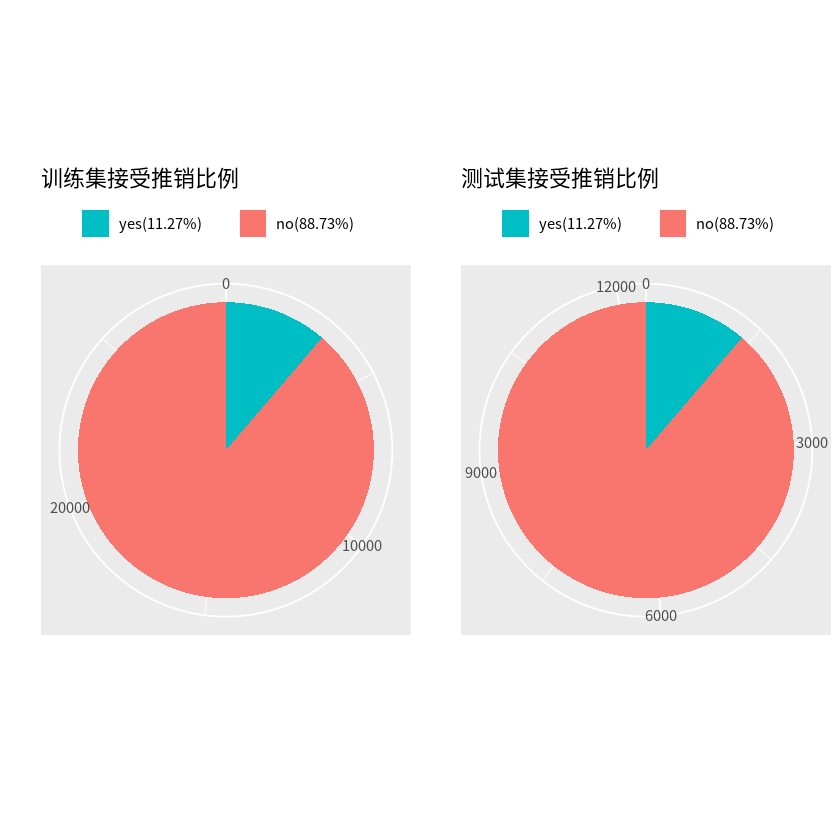

In [24]:
# 训练集分割
partition_indexed<-createDataPartition(train$y,times=1,p=.7,list=FALSE)
bank.train<-train[partition_indexed,]
bank.test<-train[-partition_indexed,]

library(ggplot2)
dt<-data.frame(A=c(sum(bank.train$y=='yes'),sum(bank.train$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p1<-p+ggtitle('训练集接受推销比例')

dt<-data.frame(A=c(sum(bank.test$y=='yes'),sum(bank.test$y=='no')),B=c('yes','no'))
myLabel = as.vector(dt$B)   ## 转成向量，否则图例的标签可能与实际顺序不一致
myLabel = paste(myLabel, "(", round(dt$A / sum(dt$A) * 100, 2), "%)        ", sep = "")   ## 用 round() 对结果保留两位小数
p <- ggplot(dt, aes(x = "", y = A, fill = B)) + 
  geom_bar(stat = "identity", width = 1) +    
  coord_polar(theta = "y") + 
  labs(x = "", y = "", title = "") + 
  theme(axis.ticks = element_blank()) + 
  theme(legend.title = element_blank(), legend.position = "top") + 
  scale_fill_discrete(breaks = dt$B, labels = myLabel)   ## 将原来的图例标签换成现在的myLabel
p2<-p+ggtitle('测试集接受推销比例')
multiplot(p1, p2,cols=2)

## 开始训练

### 结果存储声明

In [25]:
matrix1 <- data.frame(model=0,Accuracy=0,Sensitivity=0,Precision=0,Specificity=0,Recall=0,F1=0,Kappa=0,TP=0,FN=0,FP=0,TF=0)
matrix1 <- matrix1[-1,]
library(miscTools)
saveMatrix1<-function(mat,label){
    df<-data.frame(mat[2])
    df3<-data.frame(mat[3])
    acc<-df3[1,1]
    df4<-data.frame(mat[4])
    sen<-df4[1,1]
    spe<-df4[2,1]
    pre<-df4[5,1]
    rec<-df4[6,1]
    f1<-df4[7,1]
    kappa<-df3[2,1]
    line<-data.frame(model=label,Accuracy=acc,Sensitivity=sen,Precesion=pre,Specificity=spe,Recall=rec,F1=f1,
                     Kappa=kappa,TP=df[1,3],FN=df[2,3],FP=df[3,3],TF=df[4,3])
    return(line)
}

matrix2 <- data.frame(model=0,Accuracy=0,Sensitivity=0,Precision=0,Specificity=0,Recall=0,F1=0,Kappa=0,TP=0,FN=0,FP=0,TF=0)
matrix2 <- matrix2[-1,]
library(miscTools)
saveMatrix2<-function(mat,label){
    df<-data.frame(mat[2])
    df3<-data.frame(mat[3])
    acc<-df3[1,1]
    df4<-data.frame(mat[4])
    sen<-df4[1,1]
    spe<-df4[2,1]
    pre<-df4[5,1]
    rec<-df4[6,1]
    f1<-df4[7,1]
    kappa<-df3[2,1]
    line<-data.frame(model=label,Accuracy=acc,Sensitivity=sen,Precesion=pre,Specificity=spe,Recall=rec,F1=f1,
                     Kappa=kappa,TP=df[1,3],FN=df[2,3],FP=df[3,3],TF=df[4,3])
    return(line)
}

In [26]:
bank.train2<-bank.train
bank.test2<-bank.test
bank.train2$duration<-NULL
bank.test2$duration<-NULL

### 逻辑回归

In [27]:
# train with logistic regression
fit_log_with<-train(y~.,data=bank.train,
              method='LogitBoost',family='binomial')
predictions<-predict(fit_log_with,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"逻辑回归"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   622   375
       no    770 10589
                                              
               Accuracy : 0.907               
                 95% CI : (0.902, 0.912)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000000000000288   
                                              
                  Kappa : 0.471               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.4468              
            Specificity : 0.9658              
         Pos Pred Value : 0.6239              
         Neg Pred Value : 0.9322              
             Prevalence : 0.1127              
         Detection Rate : 0.0503              
   Detection Prevalence : 0.0807              
      Balanced Accuracy : 0.7063              
                                

In [28]:
# cut duration
fit_log_without<-train(y~.,data=bank.train2,
              method='LogitBoost',family='binomial')
predictions<-predict(fit_log_without,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"逻辑回归"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   386   257
       no   1006 10707
                                              
               Accuracy : 0.898               
                 95% CI : (0.892, 0.903)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000106            
                                              
                  Kappa : 0.332               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2773              
            Specificity : 0.9766              
         Pos Pred Value : 0.6003              
         Neg Pred Value : 0.9141              
             Prevalence : 0.1127              
         Detection Rate : 0.0312              
   Detection Prevalence : 0.0520              
      Balanced Accuracy : 0.6269              
                                

## SVM
kernel	
the kernel used in training and predicting. You might consider changing some of the following parameters, depending on the kernel type.

linear:

𝑢′∗𝑣

polynomial:

(𝑔𝑎𝑚𝑚𝑎∗𝑢′∗𝑣+𝑐𝑜𝑒𝑓0)𝑑𝑒𝑔𝑟𝑒𝑒

radial basis:

𝑒𝑥𝑝(−𝑔𝑎𝑚𝑚𝑎∗|𝑢−𝑣|2)

sigmoid:

𝑡𝑎𝑛ℎ(𝑔𝑎𝑚𝑚𝑎∗𝑢′∗𝑣+𝑐𝑜𝑒𝑓0)

In [29]:
# library(e1071)
# tuned<-tune(svm,y~.,
#            data=bank.train,
#            kernel='polynomial',
#            ranges=list(cost=c(0.001,0.01,0.1,1,10,100)))
# summary(tuned)

In [30]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train,kernel='polynomial',cost=100,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"SVM-多项式核函数"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   496   230
       no    896 10734
                                              
               Accuracy : 0.909               
                 95% CI : (0.904, 0.914)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.00000000000000363 
                                              
                  Kappa : 0.424               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.3563              
            Specificity : 0.9790              
         Pos Pred Value : 0.6832              
         Neg Pred Value : 0.9230              
             Prevalence : 0.1127              
         Detection Rate : 0.0401              
   Detection Prevalence : 0.0588              
      Balanced Accuracy : 0.6677              
                                

### SVM-linear

In [31]:
# tuned<-tune(svm,y~.,
#            data=bank.train,
#            kernel='linear',
#            ranges=list(cost=c(0.001,0.01,0.1,1,10,100)))
# summary(tuned)

In [32]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train,kernel='linear',cost=.1,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"SVM-线性核函数"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   564   317
       no    828 10647
                                              
               Accuracy : 0.907               
                 95% CI : (0.902, 0.912)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000000000000288   
                                              
                  Kappa : 0.448               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.4052              
            Specificity : 0.9711              
         Pos Pred Value : 0.6402              
         Neg Pred Value : 0.9278              
             Prevalence : 0.1127              
         Detection Rate : 0.0456              
   Detection Prevalence : 0.0713              
      Balanced Accuracy : 0.6881              
                                

### SVM-Drop duration Linear

In [33]:
# tuned<-tune(svm,y~.,
#            data=bank.train2,
#            kernel='linear',
#            ranges=list(cost=c(0.01,0.1,1,10)))
# summary(tuned)

In [34]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train2,kernel='linear',cost=1,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test2[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"SVM-线性核函数"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   318   209
       no   1074 10755
                                              
               Accuracy : 0.896               
                 95% CI : (0.891, 0.901)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000905            
                                              
                  Kappa : 0.287               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2284              
            Specificity : 0.9809              
         Pos Pred Value : 0.6034              
         Neg Pred Value : 0.9092              
             Prevalence : 0.1127              
         Detection Rate : 0.0257              
   Detection Prevalence : 0.0427              
      Balanced Accuracy : 0.6047              
                                

### SVM-Drop duration Polynomial

In [35]:
# tuned<-tune(svm,y~.,
#            data=bank.train2,
#            kernel='polynomial',
#            ranges=list(cost=c(0.01,0.1,1,10)))
# summary(tuned)

In [36]:
# svm
library('e1071')
svmfit<-svm(y~.,data=bank.train2,kernel='polynomial',cost=.001,scale=FALSE)
# summary(svmfit)
predictions.svm<-predict(svmfit,bank.test2[,-1],type='class')
mat<-confusionMatrix(predictions.svm,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"SVM-多项式核函数"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   330   186
       no   1062 10778
                                              
               Accuracy : 0.899               
                 95% CI : (0.894, 0.904)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.0000171           
                                              
                  Kappa : 0.303               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2371              
            Specificity : 0.9830              
         Pos Pred Value : 0.6395              
         Neg Pred Value : 0.9103              
             Prevalence : 0.1127              
         Detection Rate : 0.0267              
   Detection Prevalence : 0.0418              
      Balanced Accuracy : 0.6101              
                                

In [37]:
head(bank.train2)

,y,job,education,default,contact,month,poutcome,housing,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2,no,services,high.school,unknown,telephone,may,nonexistent,no,57,1,999,0,1.1,93.99,-36.4,4.857,5191
3,no,services,high.school,no,telephone,may,nonexistent,yes,37,1,999,0,1.1,93.99,-36.4,4.857,5191
6,no,services,basic.9y,unknown,telephone,may,nonexistent,no,45,1,999,0,1.1,93.99,-36.4,4.857,5191
9,no,technician,professional.course,no,telephone,may,nonexistent,yes,24,1,999,0,1.1,93.99,-36.4,4.857,5191
10,no,services,high.school,no,telephone,may,nonexistent,yes,25,1,999,0,1.1,93.99,-36.4,4.857,5191
11,no,blue-collar,unknown,unknown,telephone,may,nonexistent,no,41,1,999,0,1.1,93.99,-36.4,4.857,5191


### 分拆

In [38]:
dummy<-dummyVars(~.,data=bank.train2[,-1])
dummy_train<-predict(dummy,bank.train2[,-1])
dummy_train<-data.frame(dummy_train)
dummy_train$y<-factor(bank.train2$y,levels=c('yes','no'))

dummy<-dummyVars(~.,data=bank.test2[,-1])
dummy_test<-predict(dummy,bank.test2[,-1])
dummy_test<-data.frame(dummy_test)
dummy_test$y<-factor(bank.test2$y,levels=c('yes','no'))

library('e1071')
svmfit<-svm(y~.,data=dummy_train,kernel='polynomial',cost=.001,scale=FALSE)
# summary(svmfit)
n<-length(dummy_test)
predictions.svm<-predict(svmfit,dummy_test[,1:(n-1)],type='class')
confusionMatrix(predictions.svm,dummy_test[,n])

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   276   167
       no   1116 10797
                                              
               Accuracy : 0.896               
                 95% CI : (0.891, 0.901)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000905            
                                              
                  Kappa : 0.261               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.1983              
            Specificity : 0.9848              
         Pos Pred Value : 0.6230              
         Neg Pred Value : 0.9063              
             Prevalence : 0.1127              
         Detection Rate : 0.0223              
   Detection Prevalence : 0.0359              
      Balanced Accuracy : 0.5915              
                                

### 神经网络
有duration-nnet

In [39]:
# nnet
nnfit<-train(y~.,data=bank.train,method='nnet',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"神经网络-nnet"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   525   287
       no    867 10677
                                              
               Accuracy : 0.907               
                 95% CI : (0.901, 0.912)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.00000000000202    
                                              
                  Kappa : 0.429               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.3772              
            Specificity : 0.9738              
         Pos Pred Value : 0.6466              
         Neg Pred Value : 0.9249              
             Prevalence : 0.1127              
         Detection Rate : 0.0425              
   Detection Prevalence : 0.0657              
      Balanced Accuracy : 0.6755              
                                

没有duration

In [40]:
# nnet
nnfit<-train(y~.,data=bank.train2,method='nnet',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"神经网络-nnet"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   308   168
       no   1084 10796
                                              
               Accuracy : 0.899               
                 95% CI : (0.893, 0.904)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.0000284           
                                              
                  Kappa : 0.289               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2213              
            Specificity : 0.9847              
         Pos Pred Value : 0.6471              
         Neg Pred Value : 0.9088              
             Prevalence : 0.1127              
         Detection Rate : 0.0249              
   Detection Prevalence : 0.0385              
      Balanced Accuracy : 0.6030              
                                

### multinom
有duration

In [41]:
# nnet
nnfit<-train(y~.,data=bank.train,method='multinom',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test[,-1])
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,'神经网络-multinom'))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   532   265
       no    860 10699
                                              
               Accuracy : 0.909               
                 95% CI : (0.904, 0.914)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.00000000000000286 
                                              
                  Kappa : 0.44                
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.3822              
            Specificity : 0.9758              
         Pos Pred Value : 0.6675              
         Neg Pred Value : 0.9256              
             Prevalence : 0.1127              
         Detection Rate : 0.0431              
   Detection Prevalence : 0.0645              
      Balanced Accuracy : 0.6790              
                                

### 没有duration

In [42]:
# multinom
nnfit<-train(y~.,data=bank.train2,method='multinom',trace=FALSE)
# summary(nnfit)
predictions<-predict(nnfit,bank.test2[,-1])
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"神经网络-multinom"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   341   177
       no   1051 10787
                                              
               Accuracy : 0.901               
                 95% CI : (0.895, 0.906)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.00000111          
                                              
                  Kappa : 0.315               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2450              
            Specificity : 0.9839              
         Pos Pred Value : 0.6583              
         Neg Pred Value : 0.9112              
             Prevalence : 0.1127              
         Detection Rate : 0.0276              
   Detection Prevalence : 0.0419              
      Balanced Accuracy : 0.6144              
                                

### 条件推理树

Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


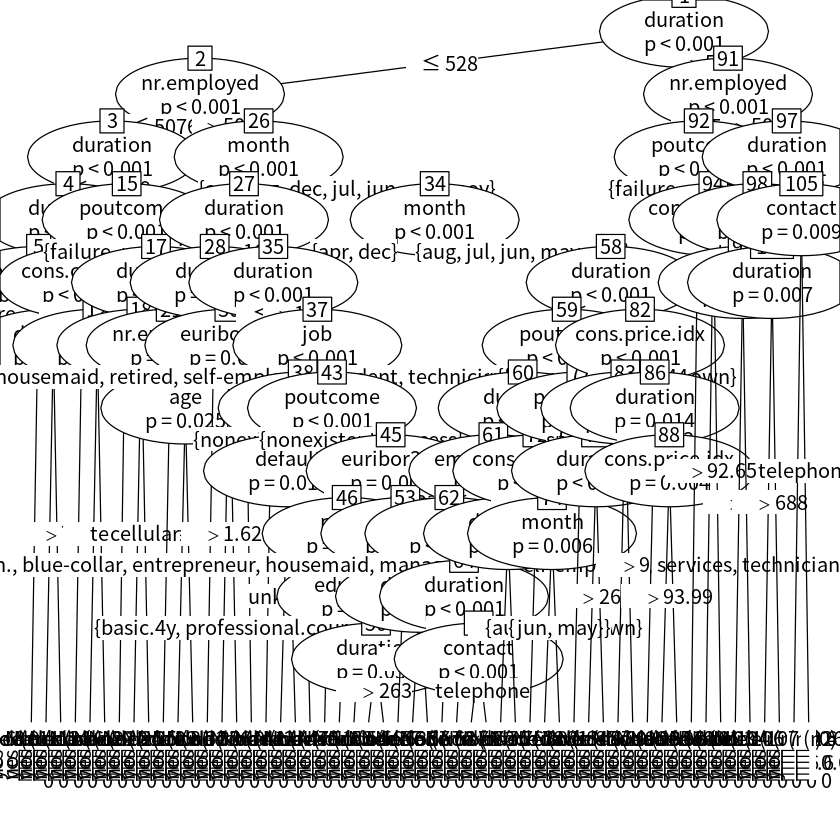

In [43]:
library(mvtnorm)
library(party)
fit_tree<-ctree(y~.,data=bank.train)
plot(fit_tree)

## 分类决策树
有duration

In [44]:
library(rpart)
tree_fit<-rpart(y~.,data=bank.train,method = 'class')
fit.pruned<-prune(tree_fit,cp=tree_fit$cptable[which.min(tree_fit$cptable[,'xerror']),'CP'])
predictions<-predict(fit.pruned,bank.test,type='class')
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"分类决策树"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   725   421
       no    667 10543
                                              
               Accuracy : 0.912               
                 95% CI : (0.907, 0.917)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : < 0.0000000000000002
                                              
                  Kappa : 0.523               
                                              
 Mcnemar's Test P-Value : 0.000000000000111   
                                              
            Sensitivity : 0.5208              
            Specificity : 0.9616              
         Pos Pred Value : 0.6326              
         Neg Pred Value : 0.9405              
             Prevalence : 0.1127              
         Detection Rate : 0.0587              
   Detection Prevalence : 0.0927              
      Balanced Accuracy : 0.7412              
                                

无duration

In [45]:
library(rpart)
tree_fit2<-rpart(y~.,data=bank.train2,method = 'class')
fit.pruned<-prune(tree_fit2,cp=tree_fit2$cptable[which.min(tree_fit2$cptable[,'xerror']),'CP'])
predictions<-predict(fit.pruned,bank.test2,type='class')
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"分类决策树"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   264   110
       no   1128 10854
                                              
               Accuracy : 0.9                 
                 95% CI : (0.894, 0.905)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.00000455          
                                              
                  Kappa : 0.264               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.1897              
            Specificity : 0.9900              
         Pos Pred Value : 0.7059              
         Neg Pred Value : 0.9059              
             Prevalence : 0.1127              
         Detection Rate : 0.0214              
   Detection Prevalence : 0.0303              
      Balanced Accuracy : 0.5898              
                                

### 分类条件推理树
有duration

In [46]:
fit.ctree<-ctree(y~.,data=bank.train)
predictions<-predict(fit.ctree,bank.test)
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"分类条件推理树"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   754   452
       no    638 10512
                                              
               Accuracy : 0.912               
                 95% CI : (0.907, 0.917)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : < 0.0000000000000002
                                              
                  Kappa : 0.531               
                                              
 Mcnemar's Test P-Value : 0.000000021         
                                              
            Sensitivity : 0.5417              
            Specificity : 0.9588              
         Pos Pred Value : 0.6252              
         Neg Pred Value : 0.9428              
             Prevalence : 0.1127              
         Detection Rate : 0.0610              
   Detection Prevalence : 0.0976              
      Balanced Accuracy : 0.7502              
                                

无duration

In [47]:
fit.ctree<-ctree(y~.,data=bank.train2)
predictions<-predict(fit.ctree,bank.test2)
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"分类条件推理树"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   323   132
       no   1069 10832
                                              
               Accuracy : 0.903               
                 95% CI : (0.897, 0.908)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.0000000159        
                                              
                  Kappa : 0.312               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2320              
            Specificity : 0.9880              
         Pos Pred Value : 0.7099              
         Neg Pred Value : 0.9102              
             Prevalence : 0.1127              
         Detection Rate : 0.0261              
   Detection Prevalence : 0.0368              
      Balanced Accuracy : 0.6100              
                                

### 随机森林
有duration

In [48]:
library(randomForest, warn.conflicts = FALSE)
fit_rf_with<-randomForest(y~.,data=bank.train)
predictions<-predict(fit_rf_with,bank.test)
mat<-confusionMatrix(predictions,bank.test[,1])
mat
matrix1<-rbind(matrix1,saveMatrix1(mat,"随机森林"))

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   698   359
       no    694 10605
                                             
               Accuracy : 0.915              
                 95% CI : (0.91, 0.92)       
    No Information Rate : 0.887              
    P-Value [Acc > NIR] : <0.0000000000000002
                                             
                  Kappa : 0.524              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.5014             
            Specificity : 0.9673             
         Pos Pred Value : 0.6604             
         Neg Pred Value : 0.9386             
             Prevalence : 0.1127             
         Detection Rate : 0.0565             
   Detection Prevalence : 0.0855             
      Balanced Accuracy : 0.7343             
                                             
    

无duration

In [49]:
library(randomForest, warn.conflicts = FALSE)
fit_rf_without<-randomForest(y~.,data=bank.train2)
predictions<-predict(fit_rf_without,bank.test2)
mat<-confusionMatrix(predictions,bank.test2[,1])
mat
matrix2<-rbind(matrix2,saveMatrix2(mat,"随机森林"))

Confusion Matrix and Statistics

          Reference
Prediction   yes    no
       yes   390   271
       no   1002 10693
                                              
               Accuracy : 0.897               
                 95% CI : (0.891, 0.902)      
    No Information Rate : 0.887               
    P-Value [Acc > NIR] : 0.000323            
                                              
                  Kappa : 0.331               
                                              
 Mcnemar's Test P-Value : < 0.0000000000000002
                                              
            Sensitivity : 0.2802              
            Specificity : 0.9753              
         Pos Pred Value : 0.5900              
         Neg Pred Value : 0.9143              
             Prevalence : 0.1127              
         Detection Rate : 0.0316              
   Detection Prevalence : 0.0535              
      Balanced Accuracy : 0.6277              
                                

In [50]:
matrix1
matrix2

model,Accuracy,Sensitivity,Precesion,Specificity,Recall,F1,Kappa,TP,FN,FP,TF
逻辑回归,0.9073,0.4468,0.6239,0.9658,0.4468,0.5207,0.4710,622,770,375,10589
SVM-多项式核函数,0.9089,0.3563,0.6832,0.9790,0.3563,0.4684,0.4239,496,896,230,10734
SVM-线性核函数,0.9073,0.4052,0.6402,0.9711,0.4052,0.4963,0.4481,564,828,317,10647
神经网络-nnet,0.9066,0.3772,0.6466,0.9738,0.3772,0.4764,0.4290,525,867,287,10677
神经网络-multinom,0.9090,0.3822,0.6675,0.9758,0.3822,0.4861,0.4401,532,860,265,10699
分类决策树,0.9119,0.5208,0.6326,0.9616,0.5208,0.5713,0.5228,725,667,421,10543
分类条件推理树,0.9118,0.5417,0.6252,0.9588,0.5417,0.5804,0.5314,754,638,452,10512
随机森林,0.9148,0.5014,0.6604,0.9673,0.5014,0.5700,0.5237,698,694,359,10605


model,Accuracy,Sensitivity,Precesion,Specificity,Recall,F1,Kappa,TP,FN,FP,TF
逻辑回归,0.8978,0.2773,0.6003,0.9766,0.2773,0.3794,0.3318,386,1006,257,10707
SVM-线性核函数,0.8962,0.2284,0.6034,0.9809,0.2284,0.3314,0.2873,318,1074,209,10755
SVM-多项式核函数,0.8990,0.2371,0.6395,0.9830,0.2371,0.3459,0.3035,330,1062,186,10778
神经网络-nnet,0.8987,0.2213,0.6471,0.9847,0.2213,0.3298,0.2889,308,1084,168,10796
神经网络-multinom,0.9006,0.2450,0.6583,0.9839,0.2450,0.3571,0.3152,341,1051,177,10787
分类决策树,0.8998,0.1897,0.7059,0.9900,0.1897,0.2990,0.2639,264,1128,110,10854
分类条件推理树,0.9028,0.2320,0.7099,0.9880,0.2320,0.3498,0.3115,323,1069,132,10832
随机森林,0.8970,0.2802,0.5900,0.9753,0.2802,0.3799,0.3314,390,1002,271,10693


In [51]:
names(matrix1) <- c("模型名称", "准确度", "灵敏度","精度","特异度","召回率","F1","Kappa","True Positive","False Negative",
              "False Positive","True Negative")

names(matrix2) <- c("模型名称", "准确度", "灵敏度","精度","特异度","召回率","F1","Kappa","True Positive","False Negative",
              "False Positive","True Negative")

write.csv(matrix1,'result/完整数据集训练结果-有duration特征.csv')
write.csv(matrix2,'result/完整数据集训练结果-无duration特征.csv')

In [52]:
matrix1

模型名称,准确度,灵敏度,精度,特异度,召回率,F1,Kappa,True Positive,False Negative,False Positive,True Negative
逻辑回归,0.9073,0.4468,0.6239,0.9658,0.4468,0.5207,0.4710,622,770,375,10589
SVM-多项式核函数,0.9089,0.3563,0.6832,0.9790,0.3563,0.4684,0.4239,496,896,230,10734
SVM-线性核函数,0.9073,0.4052,0.6402,0.9711,0.4052,0.4963,0.4481,564,828,317,10647
神经网络-nnet,0.9066,0.3772,0.6466,0.9738,0.3772,0.4764,0.4290,525,867,287,10677
神经网络-multinom,0.9090,0.3822,0.6675,0.9758,0.3822,0.4861,0.4401,532,860,265,10699
分类决策树,0.9119,0.5208,0.6326,0.9616,0.5208,0.5713,0.5228,725,667,421,10543
分类条件推理树,0.9118,0.5417,0.6252,0.9588,0.5417,0.5804,0.5314,754,638,452,10512
随机森林,0.9148,0.5014,0.6604,0.9673,0.5014,0.5700,0.5237,698,694,359,10605


## 模型评估
### 逻辑回归模型评估

In [53]:
library(DALEX)
performance.test<-bank.test
performance.test$y<-as.vector(performance.test$y)
performance.test$y[performance.test$y=='yes']<-0
performance.test$y[performance.test$y=='no']<-1
performance.test$y=as.numeric(performance.test$y)
performance.test2<-bank.test2
performance.test2$y<-as.vector(performance.test2$y)
performance.test2$y[performance.test2$y=='yes']<-0
performance.test2$y[performance.test2$y=='no']<-1
performance.test2$y=as.numeric(performance.test2$y)

Welcome to DALEX (version: 0.4.4).
Find examples and detailed introduction at: https://pbiecek.github.io/PM_VEE/
Additional features will be available after installation of: ingredients, iBreakDown, ALEPlot, breakDown, factorMerger.
Use 'install_dependencies()' to get all suggested dependencies


Warning message:
“Please note that 'variable_importance()' is now deprecated, it is better to use 'ingredients::feature_importance()' instead.
Find examples and detailed introduction at: https://pbiecek.github.io/PM_VEE/featureImportance.html”

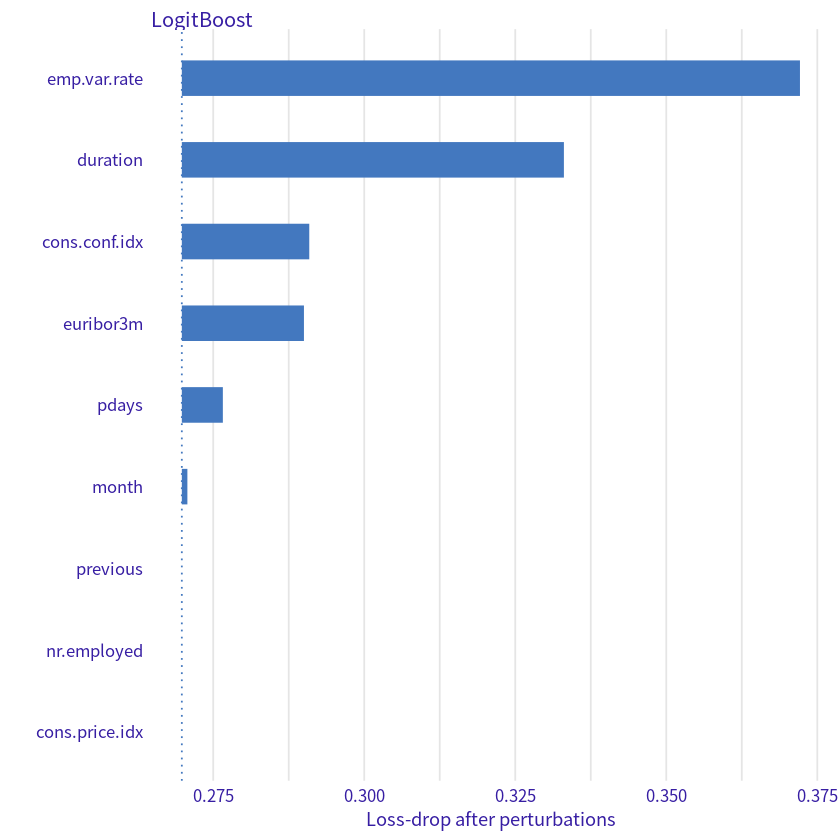

In [54]:
explainer_log_with <- DALEX::explain(fit_log_with, label="LogitBoost", 
                                    data = performance.test, 
                                     y = performance.test$y
                                    ,type='class')
mp_log_with<-model_performance(explainer_log_with)
vi_log_with<-variable_importance(explainer_log_with,
                                 loss_function=loss_root_mean_square)
plot(vi_log_with)

### 无duration

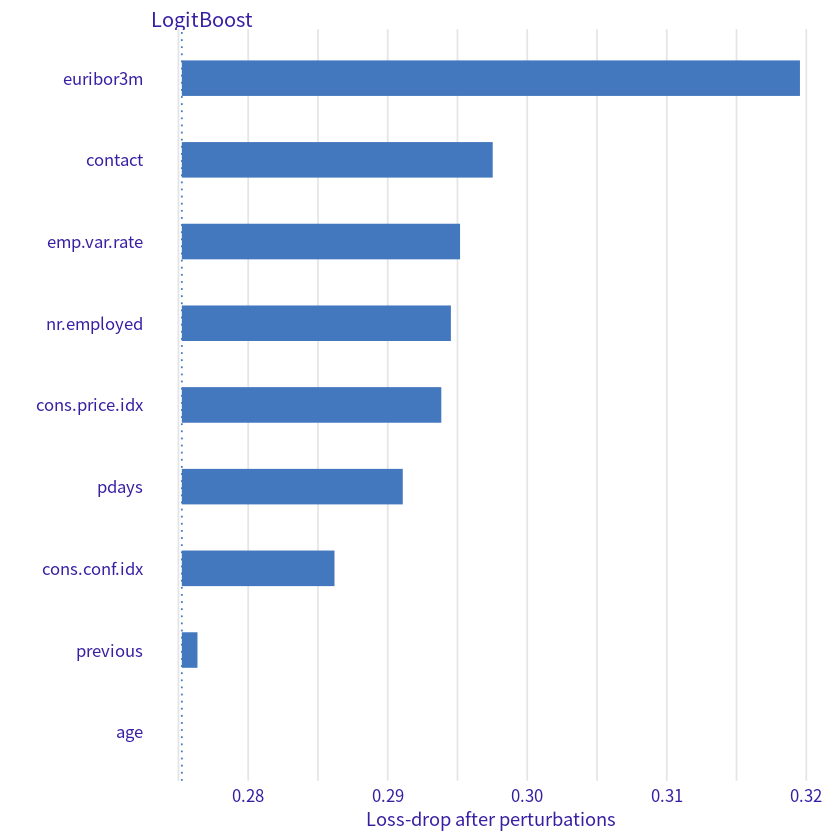

In [55]:
explainer_log_without <- DALEX::explain(fit_log_without, 
                                        label="LogitBoost", 
                                    data = performance.test2, 
                                     y = performance.test2$y
                                    ,type='class')
mp_log_without<-model_performance(explainer_log_without)
vi_log_without<-variable_importance(explainer_log_without,
                                 loss_function=loss_root_mean_square)
plot(vi_log_without)

### 随机森林评估

有duration

Warning message:
“Please note that 'variable_response()' is now deprecated, it is better to use 'ingredients::partial_dependency()' instead.
Find examples and detailed introduction at: https://pbiecek.github.io/PM_VEE/partialDependenceProfiles.html”

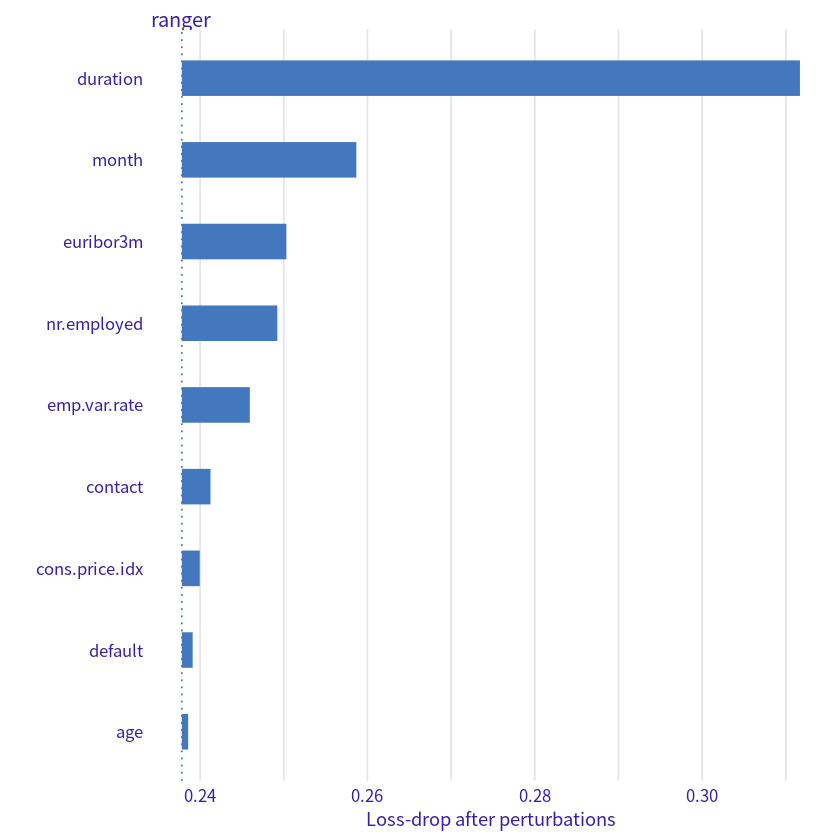

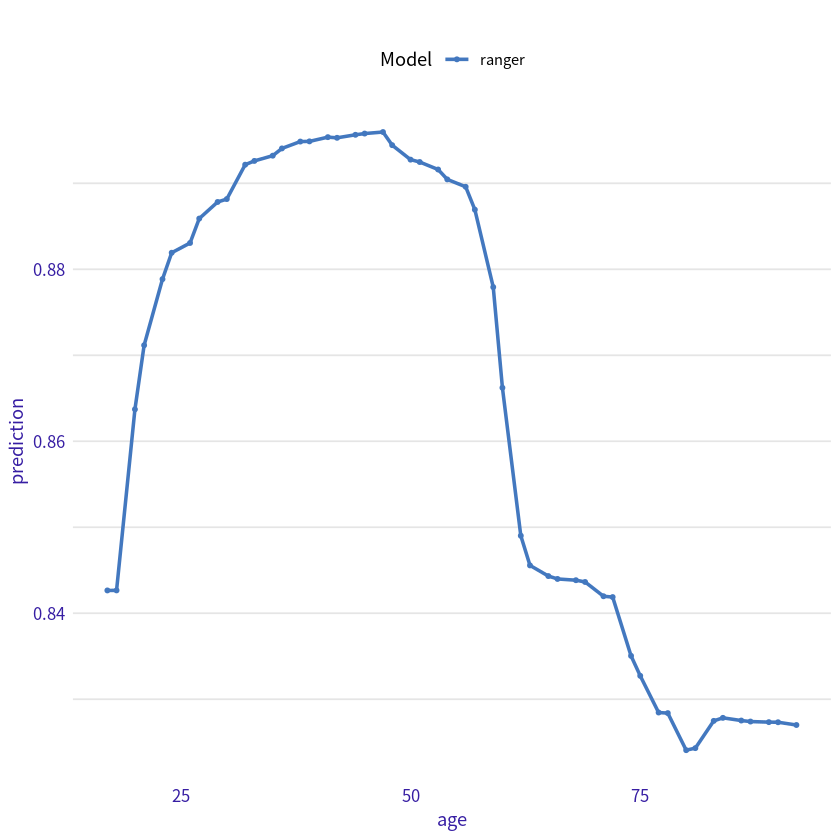

In [56]:
explainer_rf_with <- DALEX::explain(fit_rf_with, label="ranger", 
                                    data = performance.test, 
                                     y = performance.test$y
                                    ,type='class')
mp_rf_with<-model_performance(explainer_rf_with)
vi_rf_with<-variable_importance(explainer_rf_with,
                                 loss_function=loss_root_mean_square)
plot(vi_rf_with)


library(pdp)
pdp_rf_with  <- variable_response(explainer_rf_with, 
                                  variable =  "age", 
                                  type = "pdp")
plot(pdp_rf_with)

### 无duration

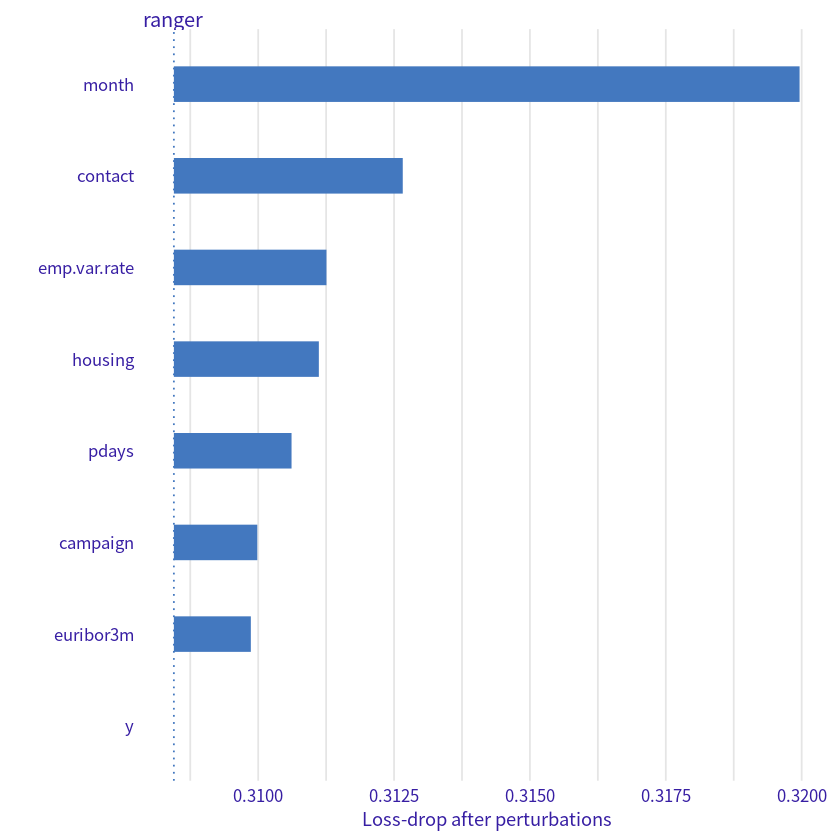

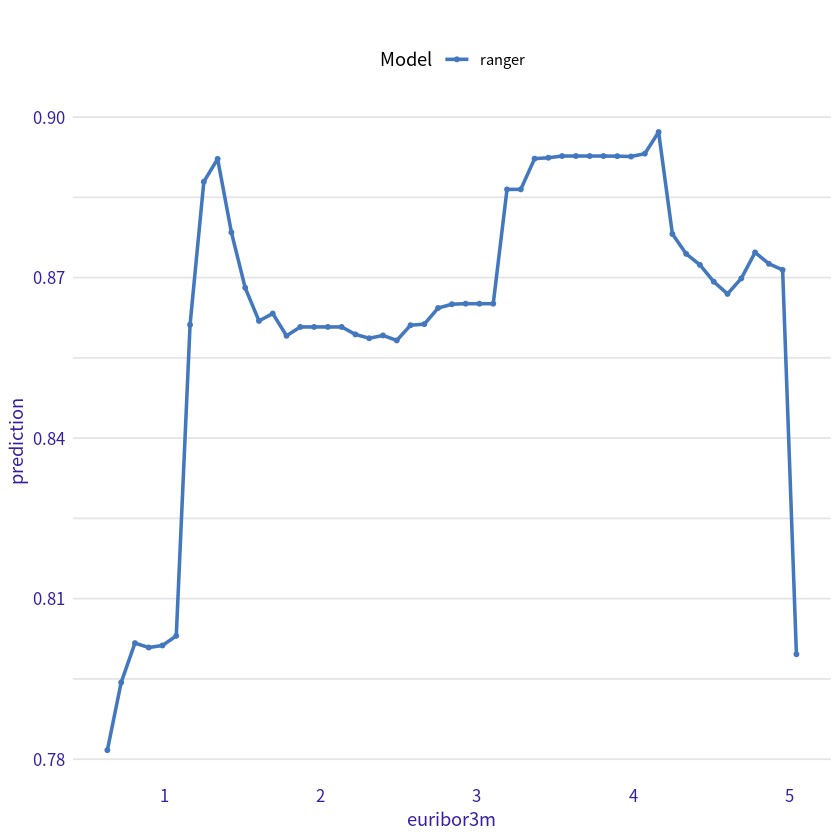

In [57]:
explainer_rf_without <- DALEX::explain(fit_rf_without, label="ranger", 
                                    data = performance.test2, 
                                     y = performance.test2$y
                                    ,type='class')
mp_rf_without<-model_performance(explainer_rf_without)
vi_rf_without<-variable_importance(explainer_rf_without,
                                 loss_function=loss_root_mean_square)
plot(vi_rf_without)

library(pdp)
pdp_rf_without  <- variable_response(explainer_rf_without, variable =  "euribor3m", type = "pdp")
plot(pdp_rf_without)

In [131]:
# summary(fit_rf_with)
fit_rf_with$importance
# summary(fit_rf_without)
fit_rf_without$importance

write.csv(fit_rf_with$importance
,'result/完整数据集-随机森林结果-特征重要程度-有duration.csv')
write.csv(fit_rf_without$importance
,
'result/完整数据集-随机森林结果-特征重要程度-无duration.csv')

importance<-fit_rf_with
library(ggplot2)
summary(dat)

,MeanDecreaseGini
job,379.25
education,280.40
default,43.29
contact,50.93
month,187.15
poutcome,159.63
housing,105.51
age,480.37
duration,1769.87
campaign,216.83


,MeanDecreaseGini
job,402.23
education,304.99
default,50.31
contact,65.24
month,174.59
poutcome,172.02
housing,137.00
age,601.30
campaign,285.46
pdays,222.07


      age              job            marital                    education    
 Min.   :17   admin.     :10422   divorced: 4612   university.degree  :12168  
 1st Qu.:32   blue-collar: 9254   married :24928   high.school        : 9515  
 Median :38   technician : 6743   single  :11568   basic.9y           : 6045  
 Mean   :40   services   : 3969   unknown :   80   professional.course: 5243  
 3rd Qu.:47   management : 2924                    basic.4y           : 4176  
 Max.   :98   retired    : 1720                    basic.6y           : 2292  
              (Other)    : 6156                    (Other)            : 1749  
    default         housing           loan            contact     
 no     :32588   no     :18622   no     :33950   cellular :26144  
 unknown: 8597   unknown:  990   unknown:  990   telephone:15044  
 yes    :    3   yes    :21576   yes    : 6248                    
                                                                  
                                 

In [136]:
# head(dat[1:10],20)
# head(dat[11:21],20)
mock<-data.frame(age=20,job='student',marital='single',education='university.degree',
                default='no',housing='no',loan='no',
                contact='cellular',month='jul',day_of_week='fri',
                duration=600,campaign=1,pdays=999,previous=0,
                poutcome='success',
                emp.var.rate=1.8,
                cons.price.idx=90,
                cons.conf.idx=-30,
                euribor3m=1.649,
                nr.employed=4000)

mock[,1:12]
mock[,13:20]
mock<-subset(mock,select=c(job,education,default,contact,month,
                               poutcome,housing,age,campaign,pdays,
                               previous,emp.var.rate,cons.price.idx,
                               cons.conf.idx,euribor3m,nr.employed))
mock <- rbind(bank.train2[1, -1] , mock)[-1,]
    
predictions<-predict(fit_rf_without,mock)
as.vector(predictions)

explainer_log_without <- DALEX::explain(fit_rf_without, 
                                        label="randomForest", 
                                    data = mock, 
                                     y = 1
                                    ,type='class')

# explainer_log_without
mp_log_without<-model_performance(explainer_log_without)
1-data.frame(mp_log_without)[,1]
vi_log_without<-variable_importance(explainer_log_without,
                                 loss_function=loss_root_mean_square)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
20,student,single,university.degree,no,no,no,cellular,jul,fri,600,1


pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
999,0,success,1.8,90,-30,1.649,4000


[1] "no"

[1] 0.406

In [127]:
# head(dat[1:10],20)
# head(dat[11:21],20)
mock<-data.frame(age=80,job='retired',marital='married',education='basic.4y',
                default='no',housing='no',loan='no',
                contact='cellular',month='mar',day_of_week='fri',
                duration=600,campaign=5,pdays=6,previous=5,
                poutcome='success',
                emp.var.rate=-1.8,
                cons.price.idx=90,
                cons.conf.idx=-30,
                euribor3m=1.649,
                nr.employed=4000)

mock[,1:12]
mock[,13:20]

mock<-subset(mock,select=c(job,education,default,contact,month,
                               poutcome,housing,age,campaign,pdays,
                               previous,emp.var.rate,cons.price.idx,
                               cons.conf.idx,euribor3m,nr.employed))
mock <- rbind(bank.train2[1, -1] , mock)[-1,]
    
# head(mock)
predictions<-predict(fit_rf_without,mock)
as.vector(predictions)

explainer_log_without <- DALEX::explain(fit_rf_without, 
                                        label="randomForest", 
                                    data = mock, 
                                     y = 1
                                    ,type='class')

# explainer_log_without
mp_log_without<-model_performance(explainer_log_without)
1-data.frame(mp_log_without)[,1]
vi_log_without<-variable_importance(explainer_log_without,
                                 loss_function=loss_root_mean_square)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign
80,retired,married,basic.4y,no,no,no,cellular,mar,fri,600,5


pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6,5,success,-1.8,90,-30,1.649,4000


[1] "yes"

[1] 0.546